In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter
from scipy.stats import pearsonr

In [97]:
# Leer el archivo Excel
hojas_dict = pd.read_excel('Internet.xlsx', sheet_name=None, decimal=',', thousands='.')

# Asignar los DataFrames convertidos a las variables correspondientes
Acc_vel_loc_sinrangos = hojas_dict[list(hojas_dict.keys())[0]]
Velocidad_sin_Rangos = hojas_dict[list(hojas_dict.keys())[1]]
Accesos_tecnologia_localidad = hojas_dict[list(hojas_dict.keys())[2]]
Velocidad_por_prov = hojas_dict[list(hojas_dict.keys())[3]]
Totales_VMD = hojas_dict[list(hojas_dict.keys())[4]]
Totales_Accesos_Por_Tecnología = hojas_dict[list(hojas_dict.keys())[5]]
Accesos_Por_Tecnología = hojas_dict[list(hojas_dict.keys())[6]]
Penetración_poblacion = hojas_dict[list(hojas_dict.keys())[7]]
Penetracion_hogares = hojas_dict[list(hojas_dict.keys())[8]]
Penetracion_totales = hojas_dict[list(hojas_dict.keys())[9]]
Totales_Accesos_por_rango = hojas_dict[list(hojas_dict.keys())[10]]
Accesos_por_rangos = hojas_dict[list(hojas_dict.keys())[11]]
Dial_BAf = hojas_dict[list(hojas_dict.keys())[12]]
Totales_Dial_BAf = hojas_dict[list(hojas_dict.keys())[13]]
Ingresos = hojas_dict[list(hojas_dict.keys())[14]]



In [98]:
# Cambia el formato de visualización
pd.options.display.float_format = '{:,.2f}'.format

In [99]:
# Lista de DataFrames y sus nombres
dfs = [
    ('Acc_vel_loc_sinrangos', Acc_vel_loc_sinrangos),
    ('Velocidad_sin_Rangos', Velocidad_sin_Rangos),
    ('Accesos_tecnologia_localidad', Accesos_tecnologia_localidad),
    ('Velocidad_por_prov', Velocidad_por_prov),
    ('Totales_VMD', Totales_VMD),
    ('Totales_Accesos_Por_Tecnología', Totales_Accesos_Por_Tecnología),
    ('Accesos_Por_Tecnología', Accesos_Por_Tecnología),
    ('Penetración_poblacion', Penetración_poblacion),
    ('Penetracion_hogares', Penetracion_hogares),
    ('Penetracion_totales', Penetracion_totales),
    ('Totales_Accesos_por_rango', Totales_Accesos_por_rango),
    ('Accesos_por_rangos', Accesos_por_rangos),
    ('Dial_BAf', Dial_BAf),
    ('Totales_Dial_BAf', Totales_Dial_BAf),
    ('Ingresos', Ingresos)
]

### **Valores faltantes y duplicados:**

/var/folders/wl/c_f94vk95sqfq_k2tgz90cs00000gn/T/ipykernel_50729/1124023059.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DataFrame', y='Porcentaje Faltantes', data=df_faltantes, palette="Blues_r", ax=axs[0])
/var/folders/wl/c_f94vk95sqfq_k2tgz90cs00000gn/T/ipykernel_50729/1124023059.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DataFrame', y='Porcentaje Duplicados', data=df_duplicados, palette="Reds_r", ax=axs[1])


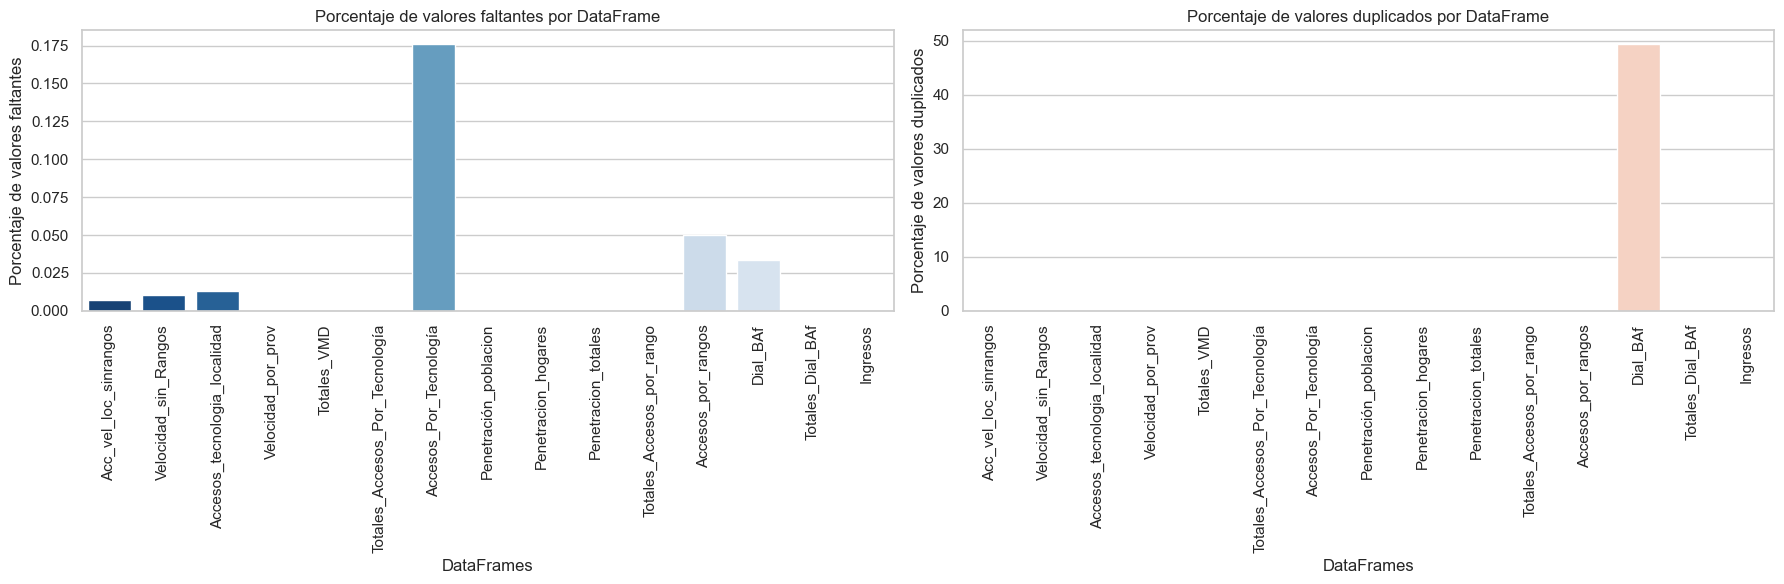

In [100]:
# Lista para almacenar los porcentajes de valores faltantes y duplicados
faltantes_porcentaje = []
duplicados_porcentaje = []

# Cálculo del porcentaje de valores faltantes y duplicados para cada DataFrame
for name, df in dfs:
    # Porcentaje de valores faltantes en el DataFrame
    total_celdas = df.size
    valores_nulos = df.isnull().sum().sum()
    porcentaje_nulos = (valores_nulos / total_celdas) * 100
    faltantes_porcentaje.append((name, porcentaje_nulos))
    
    # Porcentaje de valores duplicados en el DataFrame
    total_filas = df.shape[0]
    duplicados = df.duplicated().sum()
    porcentaje_duplicados = (duplicados / total_filas) * 100
    duplicados_porcentaje.append((name, porcentaje_duplicados))

# Convierte las listas en DataFrames para facilitar la graficación
df_faltantes = pd.DataFrame(faltantes_porcentaje, columns=['DataFrame', 'Porcentaje Faltantes'])
df_duplicados = pd.DataFrame(duplicados_porcentaje, columns=['DataFrame', 'Porcentaje Duplicados'])

# Crea una figura con dos subplots (1 fila, 2 columnas)
fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # Ajustar el tamaño de la figura

# Grafica el porcentaje de valores faltantes en el primer subplot
sns.barplot(x='DataFrame', y='Porcentaje Faltantes', data=df_faltantes, palette="Blues_r", ax=axs[0])
axs[0].set_title('Porcentaje de valores faltantes por DataFrame')
axs[0].set_ylabel('Porcentaje de valores faltantes')
axs[0].set_xlabel('DataFrames')
axs[0].tick_params(axis='x', rotation=90)

# Grafica el porcentaje de valores duplicados en el segundo subplot
sns.barplot(x='DataFrame', y='Porcentaje Duplicados', data=df_duplicados, palette="Reds_r", ax=axs[1])
axs[1].set_title('Porcentaje de valores duplicados por DataFrame')
axs[1].set_ylabel('Porcentaje de valores duplicados')
axs[1].set_xlabel('DataFrames')
axs[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

##### Podemos apreciar el casi nulo porcentaje valores faltantes en cada uno de las hojas, permitiendonos desestimar este aspecto en futuros análisis.
##### A su vez, es destacable la cantidad de datos duplicados en "Dial_BAf", una característica capaz entendible dado el tipo de información almacenada, pero no por eso obviable.

### **Valores faltantes y duplicados:**

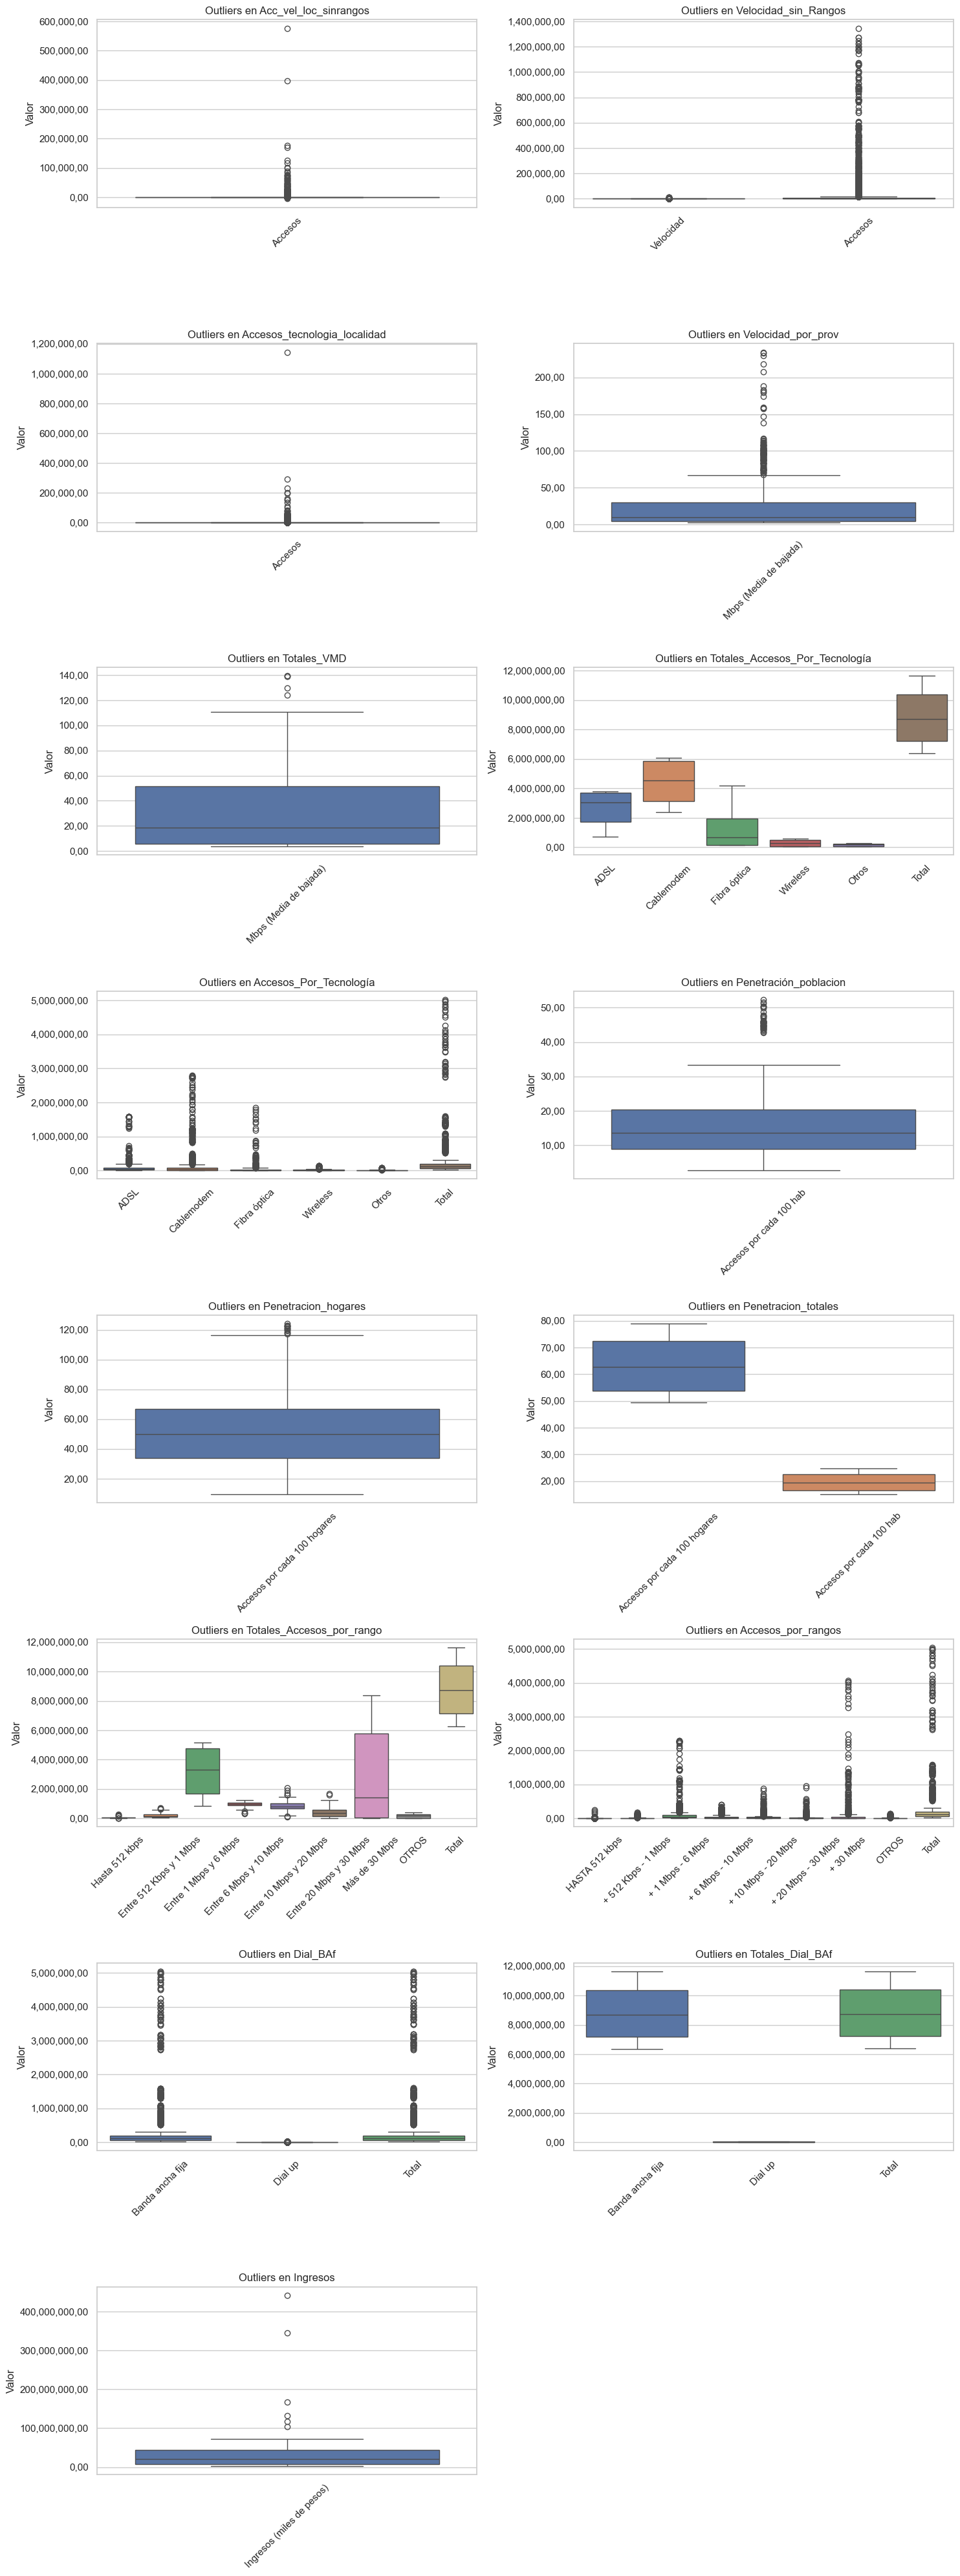

In [101]:
# Establece el estilo de los gráficos
sns.set(style="whitegrid")

# Crea un gráfico con múltiples subgráficos (2 por línea)
num_cols = 2
num_rows = (len(dfs) + num_cols - 1) // num_cols 
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Función para formatear números con coma como separador decimal
def format_func(value, tick_number):
    return f'{value:,.2f}'.replace('.', ',')

# Recorre cada DataFrame y crear un boxplot
for i, (name, df) in enumerate(dfs):
    # Selecciona columnas numéricas y excluir "Año", "Provincia" y "Trimestre"
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    numeric_cols = numeric_cols[~numeric_cols.isin(['Año', 'Provincia', 'Trimestre'])]
    
    if len(numeric_cols) > 0:
        sns.boxplot(data=df[numeric_cols], ax=axes[i])
        axes[i].set_title(f'Outliers en {name}')
        axes[i].set_ylabel('Valor')
        axes[i].set_xlabel("")
        axes[i].tick_params(axis='x', rotation=45)
        
        # Formatea los ticks del eje y
        axes[i].yaxis.set_major_formatter(FuncFormatter(format_func))
    else:
        axes[i].set_title(f'No hay columnas numéricas en {name}')

# Oculta ejes vacíos si hay menos de 15 DataFrames
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


##### Queda clara la existencia de errores humanos o de medición en alguno de los datos, como el caso de la columna "Accesos" en "Accesos_tecnoogía_localidad". Sin embargo, en otras situaciones, sería adecuado tomar en consideración ciertos factores socioeconomicos sucedidos en Argentina. Siendo este el caso de valores atípicos en la columna "Ingresos", donde el monto es un resultado de la constante inflación que sufre el país. O bien al evaluar la cantidad de accesos por cada 100 habitantes, donde la mayoria de los casos de menor o mayor volumen, se entienden dentro del marco de desigualdad social y de conectividad en zonas mas inaccesibles con repecto a las grandes ciudades.

### **Analisis Descriptivo:**

In [102]:
# Crea un DataFrame de resumen
summary_df = pd.DataFrame()

# Itera sobre cada DataFrame y calcula estadísticas
for name, df in dfs:
    desc = df.describe().T  # Transpone el DataFrame para facilitar la visualización
    desc['Dataset'] = name  # Agrega el nombre del dataset
    summary_df = pd.concat([summary_df, desc], axis=0)

# Resetear el índice
summary_df.reset_index(inplace=True)

In [103]:
summary_df.head(36)

,index,count,mean,std,min,25%,50%,75%,max,Dataset
0,Provincia,"18,864.00",66.87,178.99,0.00,3.00,10.00,30.00,"1,024.00",Acc_vel_loc_sinrangos
1,Accesos,"18,857.00",612.83,"6,283.36","-5,582.00",3.00,26.00,180.00,"576,789.00",Acc_vel_loc_sinrangos
2,Año,"18,884.00","2,021.02",1.92,"2,017.00","2,019.00","2,021.00","2,023.00","2,024.00",Velocidad_sin_Rangos
3,Trimestre,"18,884.00",2.48,1.13,1.00,1.00,2.00,4.00,4.00,Velocidad_sin_Rangos
4,Velocidad,"18,874.00",96.17,379.72,0.00,4.00,12.30,50.10,"10,000.00",Velocidad_sin_Rangos
5,Accesos,"18,884.00","14,123.28","68,563.87",0.00,26.00,672.50,"6,114.00","1,346,370.00",Velocidad_sin_Rangos
6,Accesos,"7,747.00","1,491.69","15,201.74",0.00,3.00,59.00,400.50,"1,144,781.00",Accesos_tecnologia_localidad
7,Año,"1,008.00","2,018.76",3.04,"2,014.00","2,016.00","2,019.00","2,021.00","2,024.00",Velocidad_por_prov
8,Trimestre,"1,008.00",2.45,1.12,1.00,1.00,2.00,3.00,4.00,Velocidad_por_prov
9,Mbps (Media de bajada),"1,008.00",24.72,33.66,2.57,4.87,10.09,29.88,234.44,Velocidad_por_prov


In [104]:
summary_df.tail(36)

,index,count,mean,std,min,25%,50%,75%,max,Dataset
36,Accesos por cada 100 hab,42.00,19.57,3.27,15.05,16.52,19.40,22.60,24.79,Penetracion_totales
37,Año,42.00,"2,018.76",3.07,"2,014.00","2,016.00","2,019.00","2,021.00","2,024.00",Totales_Accesos_por_rango
38,Trimestre,42.00,2.45,1.13,1.00,1.25,2.00,3.00,4.00,Totales_Accesos_por_rango
39,Hasta 512 kbps,42.00,"46,756.60","48,922.97","5,675.00","29,027.75","34,960.00","41,057.50","241,713.00",Totales_Accesos_por_rango
40,Entre 512 Kbps y 1 Mbps,42.00,"215,615.29","192,134.70","28,521.00","69,951.75","150,273.00","279,159.25","687,619.00",Totales_Accesos_por_rango
41,Entre 1 Mbps y 6 Mbps,42.00,"3,176,364.79","1,552,136.43","840,200.00","1,692,723.75","3,313,002.50","4,780,395.50","5,153,437.00",Totales_Accesos_por_rango
42,Entre 6 Mbps y 10 Mbps,42.00,"915,481.86","229,375.83","289,182.00","862,345.25","978,762.00","1,058,517.50","1,245,333.00",Totales_Accesos_por_rango
43,Entre 10 Mbps y 20 Mbps,42.00,"884,427.64","451,590.03","101,127.00","677,435.50","792,972.50","1,022,656.50","2,068,087.00",Totales_Accesos_por_rango
44,Entre 20 Mbps y 30 Mbps,42.00,"478,365.62","433,434.31",345.00,"135,803.50","361,249.50","592,545.00","1,688,748.00",Totales_Accesos_por_rango
45,Más de 30 Mbps,42.00,"2,909,772.26","3,138,714.70","11,595.00","32,914.00","1,408,279.00","5,761,285.00","8,363,694.00",Totales_Accesos_por_rango


### **Distribucion de Variables Cuantitativas Relevantes:**

### Velocidad de descarga:

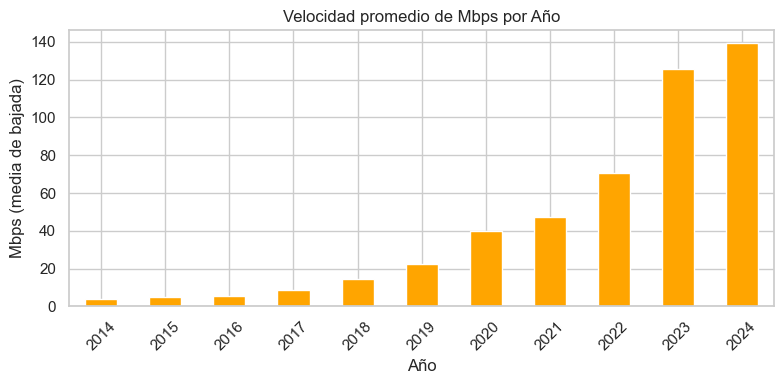

In [177]:
# Obtiene el DataFrame correspondiente
df4 = hojas_dict[list(hojas_dict.keys())[4]]

# Agrupa por el año y calcular el promedio de velocidad de Mbps por año
df_grouped = df4.groupby('Año')['Mbps (Media de bajada)'].mean()

# Crea el gráfico de barras
plt.figure(figsize=(8, 4))
df_grouped.plot(kind='bar', color="Orange")

# Características del gráfico
plt.title('Velocidad promedio de Mbps por Año')
plt.xlabel('Año')
plt.ylabel('Mbps (media de bajada)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Se nota el crecimiento esperado en la velocidad entre los años 2014 y 2022, con un gran salto entre 2022 y 2023, aunque la tendencia continuó a menor ritmo durante este año.

### Tecnologías:

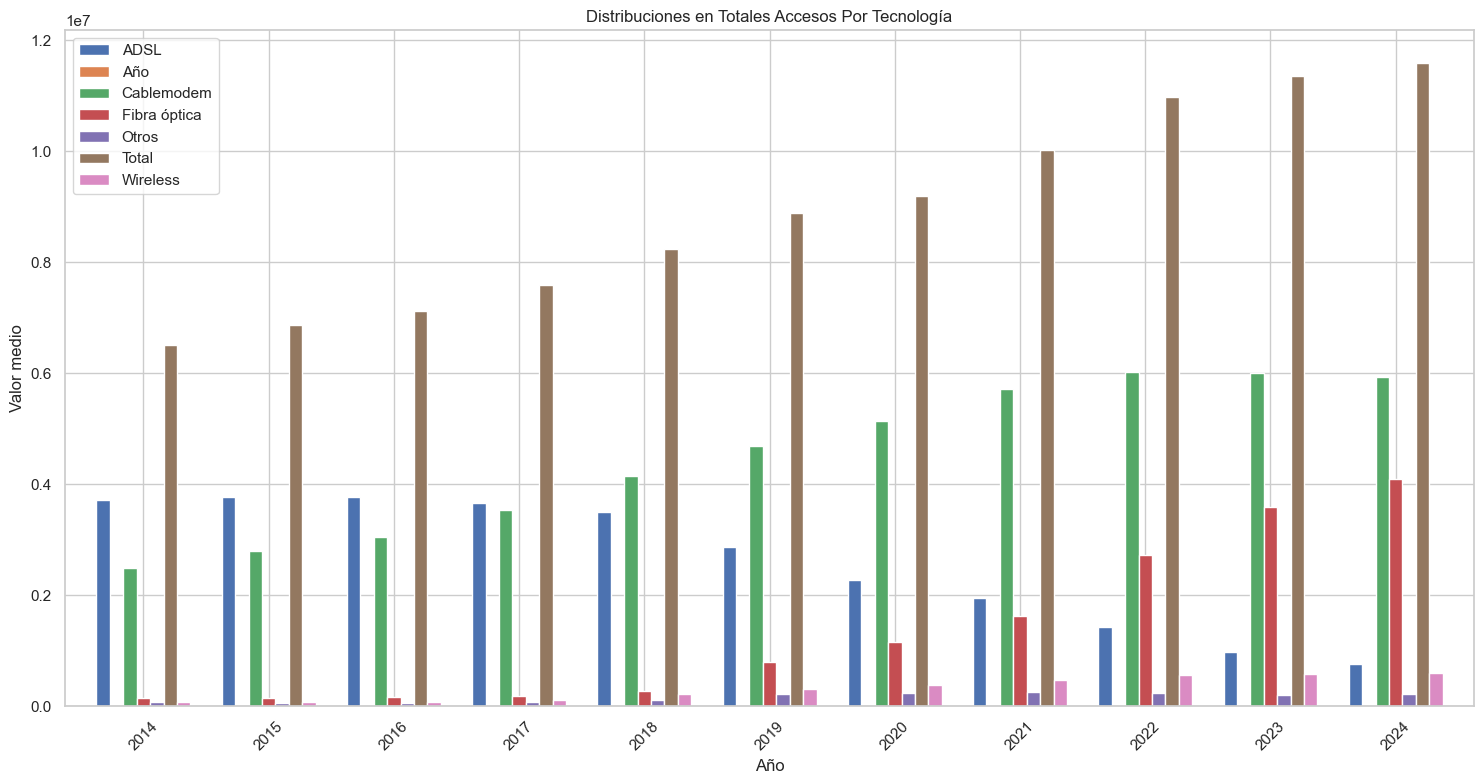

In [138]:

df5 = hojas_dict[list(hojas_dict.keys())[5]]

# Filtra columnas numéricas y excluye 'Trimestre' y 'Accesos'
numeric_columns = df5.select_dtypes(include=['number']).columns
columns_to_plot = numeric_columns.difference(['Trimestre', 'Accesos'])

# Agrupa por año y calcula la media para cada columna numérica
df_grouped = df5.groupby('Año')[columns_to_plot].mean()

# Crea un gráfico de barras para cada columna numérica
df_grouped.plot(kind='bar', figsize=(15, 8), width=0.75)

# Caracterísitcas del gráfico
plt.title('Distribuciones en Totales Accesos Por Tecnología')
plt.xlabel('Año')
plt.ylabel('Valor medio')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

##### El crecimiento es claro en el total, a pesar de la caida de ADSL. Las tecnologías mas accesibles economicamente (como el Cablemodem) destacan por su cantidad en contraposición a las mas costosas (Fribra Óptica). Aunque bien, esta última viene ganando bastante terreno en los ultimos 5 años.

### Acceso a internet:

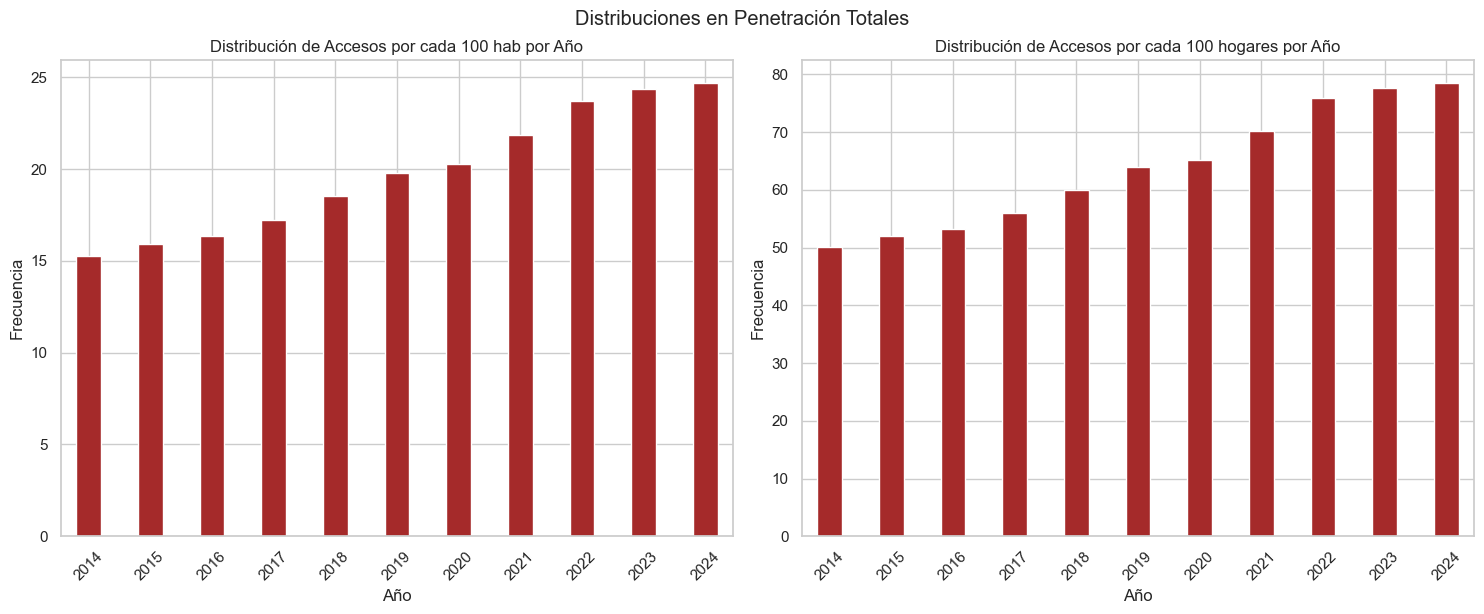

In [175]:
df9 = hojas_dict[list(hojas_dict.keys())[9]]  # Obtener el DataFrame correspondiente

# Filtra columnas numéricas y excluye 'Trimestre' y 'Accesos'
numeric_columns = df9.select_dtypes(include=['number']).columns
columns_to_plot = numeric_columns.difference(['Año', 'Trimestre', 'Accesos'])

# Crea un gráfico de barras para cada columna filtrada, agrupado por 'Año'
num_columns = len(columns_to_plot)
fig, axes = plt.subplots(1, num_columns, figsize=(15, 6))

for ax, col in zip(axes, columns_to_plot):
    df9.groupby('Año')[col].mean().plot(kind='bar', ax=ax, width=0.4,color = "brown")

    # Características del gráfico
    ax.set_title(f'Distribución de {col} por Año')
    ax.set_xlabel('Año')
    ax.set_ylabel('Frecuencia')
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.suptitle('Distribuciones en Penetración Totales', y=1.02)
plt.show()



##### Es destacable la tendencia ascendente prácticamente calcada de ambos gráficos.

### Rangos:

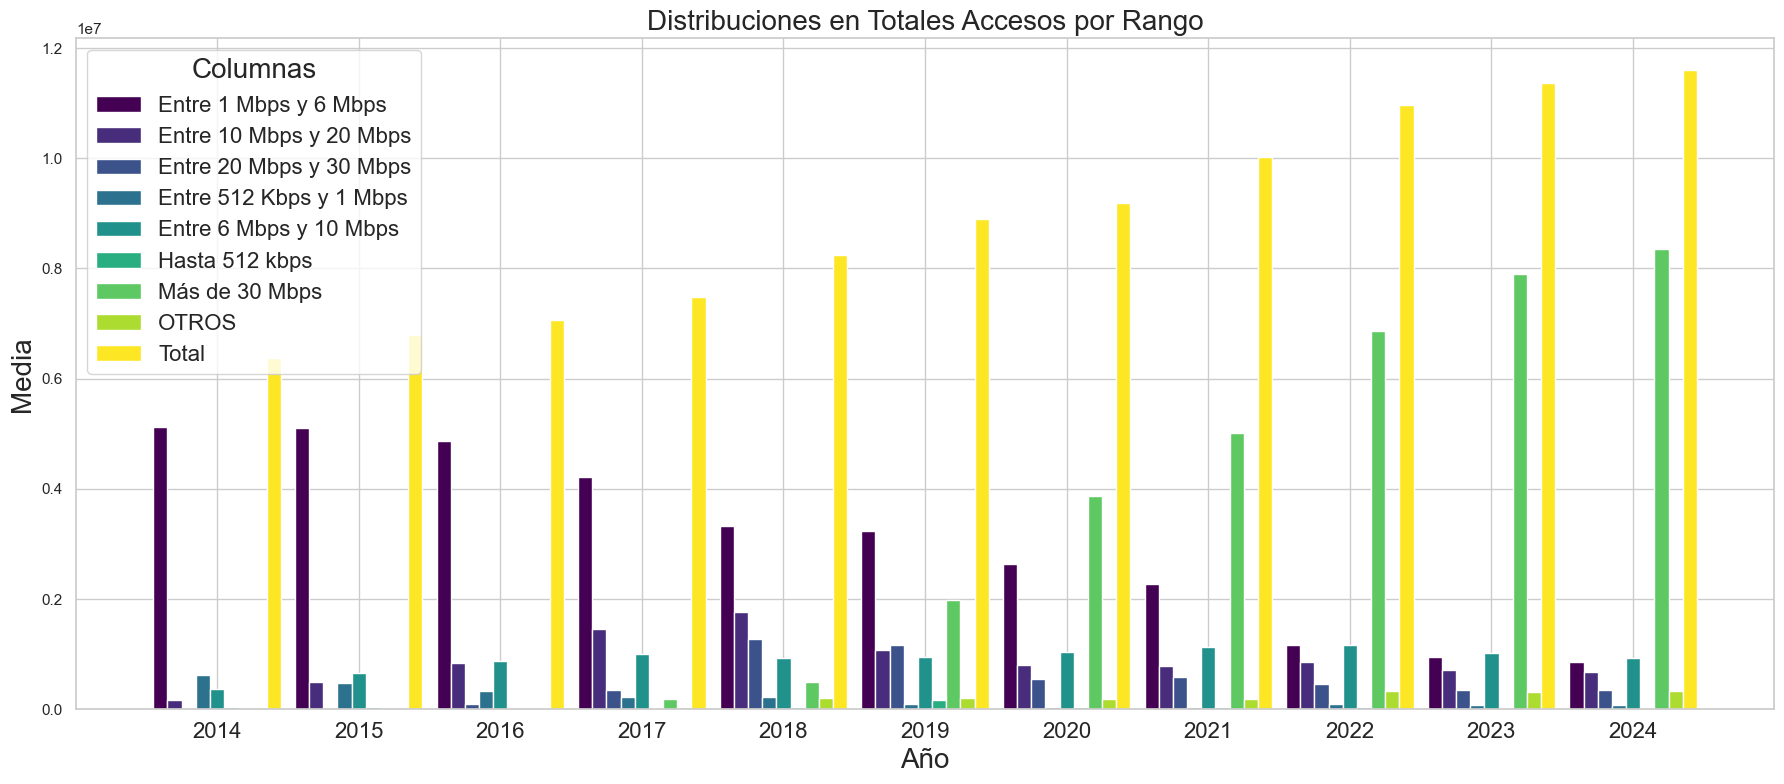

In [166]:
df10 = hojas_dict[list(hojas_dict.keys())[10]]  # Obtener el DataFrame correspondiente

# Filtra columnas numéricas y excluye 'Año', 'Trimestre' y 'Accesos'
numeric_columns = df10.select_dtypes(include=['number']).columns
columns_to_plot = numeric_columns.difference(['Año', 'Trimestre', 'Accesos'])

# Configuración de colores
colors = plt.cm.viridis(np.linspace(0, 1, len(columns_to_plot)))

# Agrupa por Año y calcula la media de cada columna
grouped_data = df10.groupby('Año')[columns_to_plot].mean()

# Crea el gráfico
fig, ax = plt.subplots(figsize=(18, 8))

# Cada columna con un color distinto
bar_width = 0.1
x = np.arange(len(grouped_data.index))

for i, col in enumerate(columns_to_plot):
    ax.bar(x + i * bar_width, grouped_data[col], width=bar_width, label=col, color=colors[i])

# Personaliza el gráfico
ax.set_title('Distribuciones en Totales Accesos por Rango', fontsize=20)
ax.set_xlabel('Año', fontsize=20)
ax.set_ylabel('Media', fontsize=20)
ax.set_xticks(x + bar_width * (len(columns_to_plot) - 1) / 2)
ax.set_xticklabels(grouped_data.index, fontsize=16)
ax.legend(title='Columnas', fontsize=16, title_fontsize=20)

plt.tight_layout()
plt.show()

##### El crecimiento abruto por parte de la velocidad de descarga denota la necesidad de poder manejar archivos de mayor tamaño y mayor disponibilidad en el mercado para llevar velocidades superiores a los clientes.

### Dial-BAf:

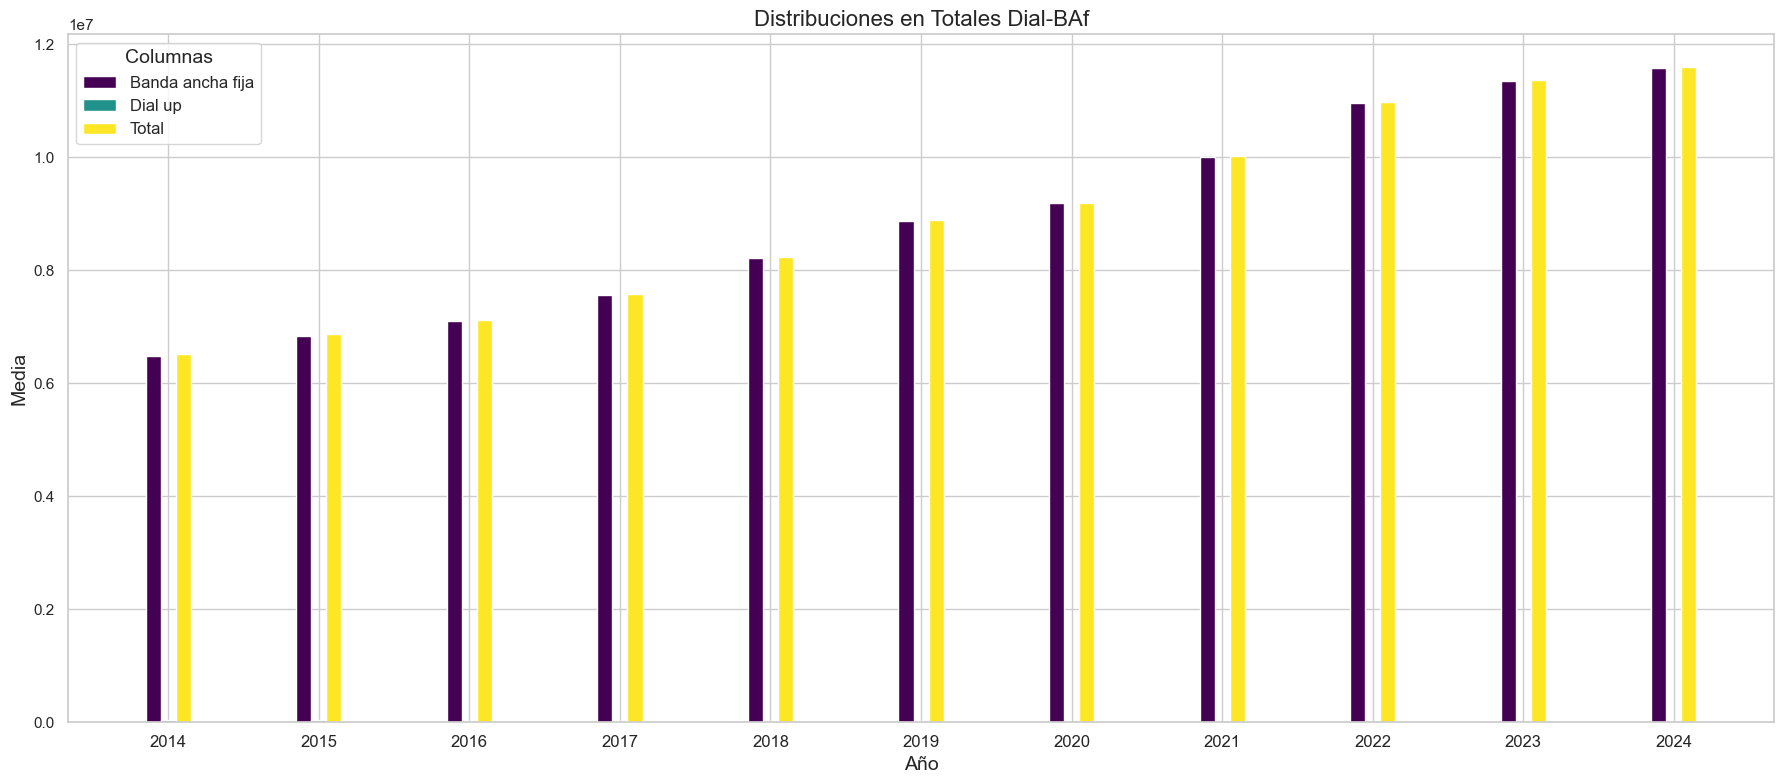

In [167]:

df13 = hojas_dict[list(hojas_dict.keys())[13]]  # Obtener el DataFrame correspondiente

# Filtra columnas numéricas y excluye 'Año', 'Trimestre' y 'Accesos'
numeric_columns = df13.select_dtypes(include=['number']).columns
columns_to_plot = numeric_columns.difference(['Año', 'Trimestre', 'Accesos'])

# Configuración de colores
colors = plt.cm.viridis(np.linspace(0, 1, len(columns_to_plot)))

# Agrupa por Año y calcula la media de cada columna
grouped_data = df13.groupby('Año')[columns_to_plot].mean()

# Crea el gráfico
fig, ax = plt.subplots(figsize=(18, 8))

# Plotea cada columna con un color distinto
bar_width = 0.1
x = np.arange(len(grouped_data.index))

for i, col in enumerate(columns_to_plot):
    ax.bar(x + i * bar_width, grouped_data[col], width=bar_width, label=col, color=colors[i])

# Características del gráfico
ax.set_title('Distribuciones en Totales Dial-BAf', fontsize=16)
ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Media', fontsize=14)
ax.set_xticks(x + bar_width * (len(columns_to_plot) - 1) / 2)
ax.set_xticklabels(grouped_data.index, fontsize=12)
ax.legend(title='Columnas', fontsize=12, title_fontsize=14)

plt.tight_layout()
plt.show()

##### Entendiendo que la Banda Ancha fija comprende básicamente el 100% del mercado, toda estrategia y toma de decisiones debería desestinar el Dial up como un mercado no fertil.

### Ingresos totales:

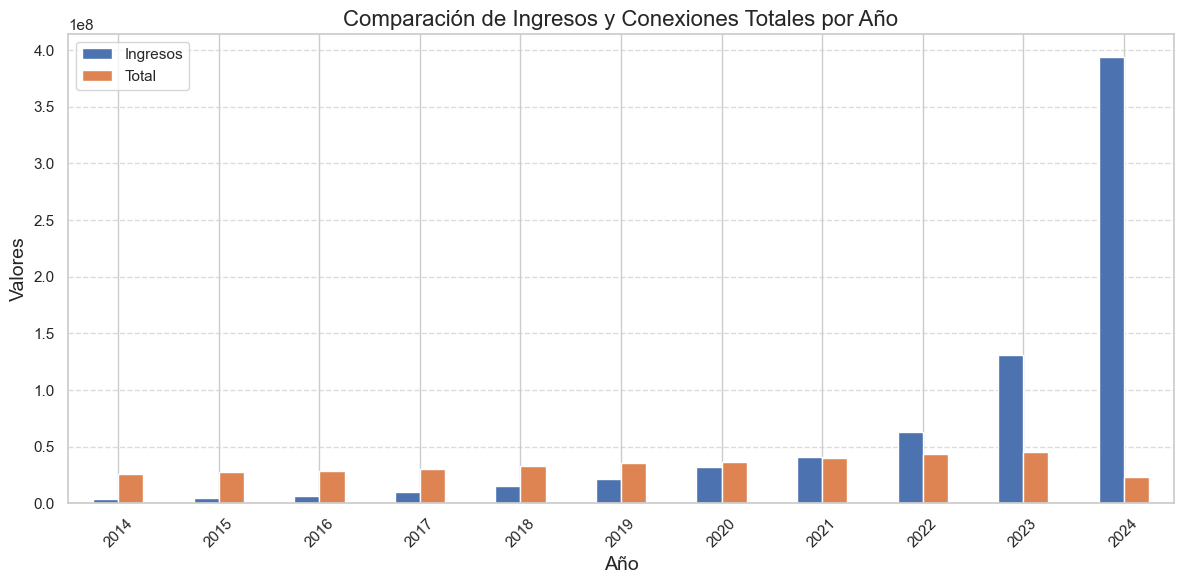

In [185]:
# Obtener los DataFrames correspondientes
df14 = hojas_dict[list(hojas_dict.keys())[14]]  # DataFrame con ingresos
df5 = hojas_dict[list(hojas_dict.keys())[5]]  # DataFrame con Totales

# Cambia el valor en la fila 6 y la columna 'Año' del df14
df14.at[5, 'Año'] = 2023

# Agrupa por el año y calcula el promedio de ingresos por año
ingresos_grouped = df14.groupby('Año')['Ingresos (miles de pesos)'].mean()

# Agrupa por el año y calcula la suma total por año
total_grouped = df5.groupby('Año')['Total'].sum()

# Combina ambos DataFrames en uno solo para el gráfico
combined_df = pd.DataFrame({
    'Ingresos': ingresos_grouped,
    'Total': total_grouped
}).fillna(0)  # Rellena NaN con 0 si hay años faltantes en alguno de los DataFrames

# Crea el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
combined_df.plot(kind='bar', ax=ax)

# Personaliza el gráfico
ax.set_title('Comparación de Ingresos y Conexiones Totales por Año', fontsize=16)
ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Valores', fontsize=14)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

##### Comparación para entender un poco mejor el fenomeno inflacionario de Argentina, viendo que la cantidad de conexiones aumentó a traves de los años pero no en la misma proporción. Información necesaria para que el crecimiento en la recaudción no llegue a sezgar el analisis y futuros objetivos.

### Velocidades de descarga por Provincia:

/var/folders/wl/c_f94vk95sqfq_k2tgz90cs00000gn/T/ipykernel_50729/1313648082.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_provincias)  # Elegir una paleta de colores con 20 colores distintos


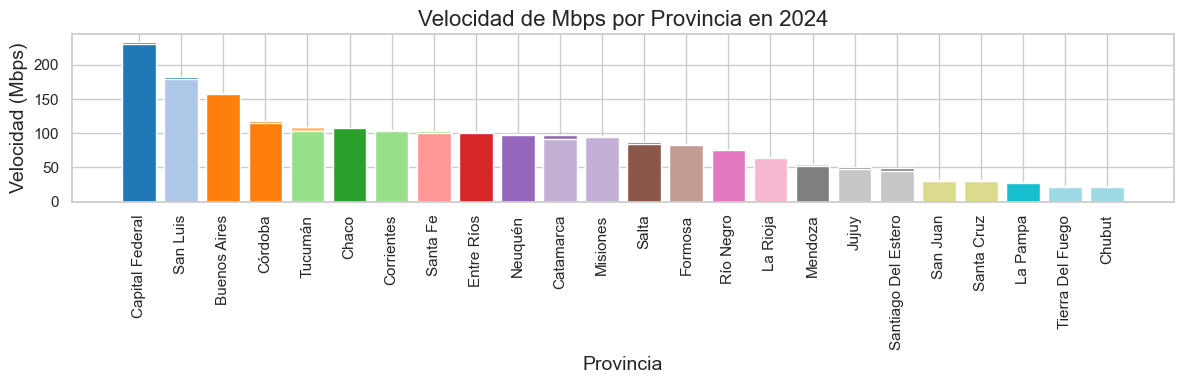

/var/folders/wl/c_f94vk95sqfq_k2tgz90cs00000gn/T/ipykernel_50729/1313648082.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_provincias)  # Elegir una paleta de colores con 20 colores distintos


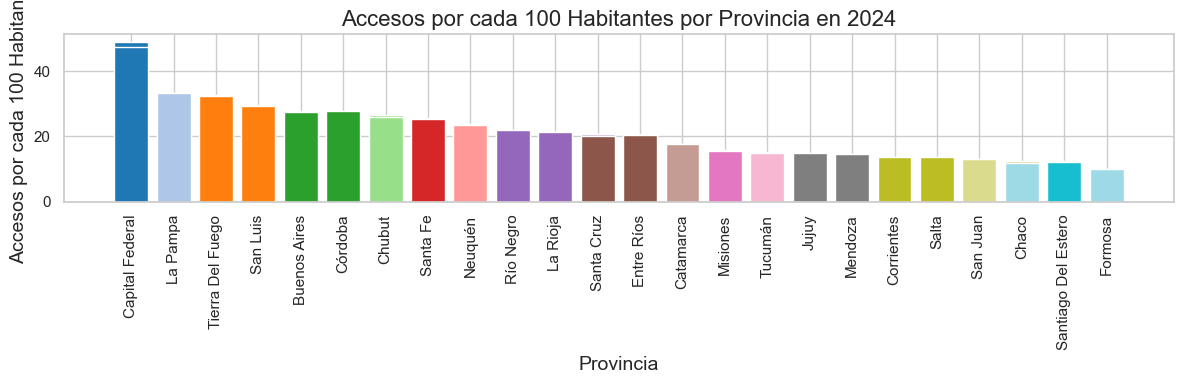

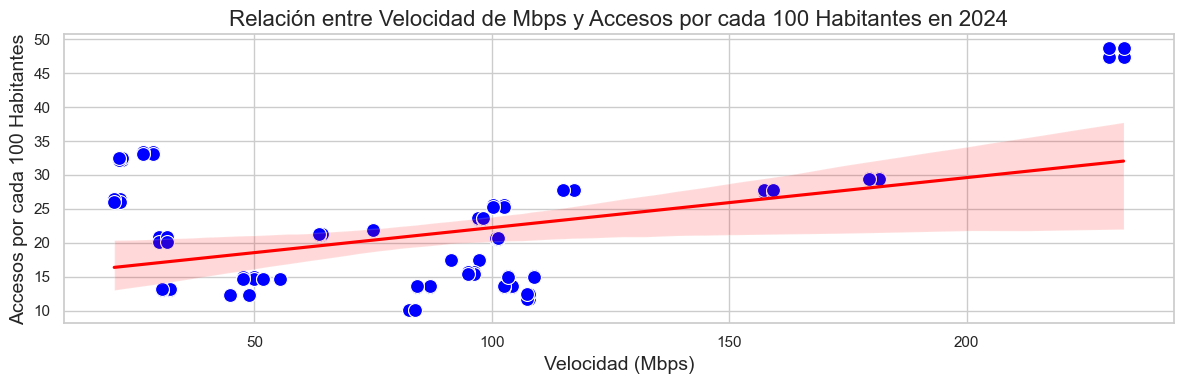

In [222]:
# Filtrar solo los datos del año 2024
df_2024 = Velocidad_por_prov[Velocidad_por_prov['Año'] == 2024]


# Ordena por la columna 'Mbps' de manera descendente
df_2024_sorted = df_2024.sort_values(by='Mbps (Media de bajada)', ascending=False)

# Crea una lista de colores única para cada provincia
num_provincias = len(df_2024_sorted)
colors = plt.cm.get_cmap('tab20', num_provincias)  # Elegir una paleta de colores con 20 colores distintos

# Crea el histograma
plt.figure(figsize=(12, 4))
plt.bar(df_2024_sorted['Provincia'], df_2024_sorted['Mbps (Media de bajada)'], color=colors(range(num_provincias)))

# Caracterísitcas del gráfico
plt.title('Velocidad de Mbps por Provincia en 2024', fontsize=16)
plt.xlabel('Provincia', fontsize=14)
plt.ylabel('Velocidad (Mbps)', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Filtra solo los datos del año 2024
df_accesos_2024 = Penetración_poblacion[Penetración_poblacion['Año'] == 2024]

# Ordena por la columna 'Accesos por cada 100 hab' de manera descendente
df_accesos_2024_sorted = df_accesos_2024.sort_values(by='Accesos por cada 100 hab', ascending=False)

# Crea una lista de colores única para cada provincia
num_provincias = len(df_2024_sorted)
colors = plt.cm.get_cmap('tab20', num_provincias)  # Elegir una paleta de colores con 20 colores distintos

# Crea el gráfico de barras
plt.figure(figsize=(12, 4))
plt.bar(df_accesos_2024_sorted['Provincia'], df_accesos_2024_sorted['Accesos por cada 100 hab'], color=colors(range(num_provincias)))

# Personaliza el gráfico
plt.title('Accesos por cada 100 Habitantes por Provincia en 2024', fontsize=16)
plt.xlabel('Provincia', fontsize=14)
plt.ylabel('Accesos por cada 100 Habitantes', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Alinea las provincias para asegurarse de que los datos coinciden
df_2024_combined = pd.merge(df_2024[['Provincia', 'Mbps (Media de bajada)']],
                            df_accesos_2024[['Provincia', 'Accesos por cada 100 hab']],
                            on='Provincia')

# Crea gráfico de dispersión
plt.figure(figsize=(12, 4))
sns.scatterplot(x='Mbps (Media de bajada)', y='Accesos por cada 100 hab', data=df_2024_combined, s=100, color='blue')

# Añade línea de tendencia
sns.regplot(x='Mbps (Media de bajada)', y='Accesos por cada 100 hab', data=df_2024_combined, scatter=False, color='red')

# Añade etiquetas y título
plt.title('Relación entre Velocidad de Mbps y Accesos por cada 100 Habitantes en 2024', fontsize=16)
plt.xlabel('Velocidad (Mbps)', fontsize=14)
plt.ylabel('Accesos por cada 100 Habitantes', fontsize=14)

plt.tight_layout()
plt.show()

##### Mas allá de saber qué provincias cuentan con mayor velocidad promedio de Mbps, es interesante analizar la relación entre las que cuentan con un alto rango de accesos por cada 100 habitantes sin disponer de altas velocidades. Esta relación podria destacar ciertos mercados que en los cuales seria inteligente mejorar el servicio dado el volumen de consumo que representan.